In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [2]:
house_price=load_boston()

In [3]:
boston=load_boston()
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.filename

'/home/manikanta/.local/lib/python3.6/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df['Price']=boston.target
print(boston_df.head(3))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  


In [13]:
newx=boston_df['Price']
print(newx[0:3])

0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64


In [14]:
newy=boston_df['Price']
print(newy[0:3])

0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64


In [15]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(house_price.data,house_price.target,test_size=0.3,random_state=3)

In [16]:
lr=LinearRegression()
lr.fit(X_traine,Y_traine)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
rr=Ridge(alpha=0.01)
rr.fit(X_traine,Y_traine)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
rr100=Ridge(alpha=100) #comparison with alpha value
rr100.fit(X_traine,Y_traine)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
X_traine.shape

(354, 13)

In [20]:
Y_traine.shape

(354,)

In [21]:
X_test.shape

(152, 13)

In [22]:
Y_test.shape

(152,)

In [23]:
traine_score=lr.score(X_traine,Y_traine)
traine_score

0.7419034960343789

In [24]:
test_score=lr.score(X_test,Y_test)
test_score

0.7147895265576849

In [25]:
Ridge_train_score=rr.score(X_traine,Y_traine)
Ridge_train_score

0.7419030253527293

In [26]:
Ridge_test_score=rr.score(X_test,Y_test)
Ridge_test_score

0.714612537312391

In [27]:
Ridge_train_score100=rr100.score(X_traine,Y_traine)
Ridge_train_score100

0.7172809669938278

In [28]:
Ridge_test_score100=rr100.score(X_test,Y_test)
Ridge_test_score100

0.6805765856921946

In [29]:
print("linear regression trine score",traine_score)
print("linear regression test score",test_score)
print("linear regression trine score low_alpha",Ridge_train_score)
print("linear regression test score high_alpha",Ridge_test_score)
print("linear regression trine score low_alpha",Ridge_train_score100)
print("linear regression test score high_alpha",Ridge_test_score100)

linear regression trine score 0.7419034960343789
linear regression test score 0.7147895265576849
linear regression trine score low_alpha 0.7419030253527293
linear regression test score high_alpha 0.714612537312391
linear regression trine score low_alpha 0.7172809669938278
linear regression test score high_alpha 0.6805765856921946


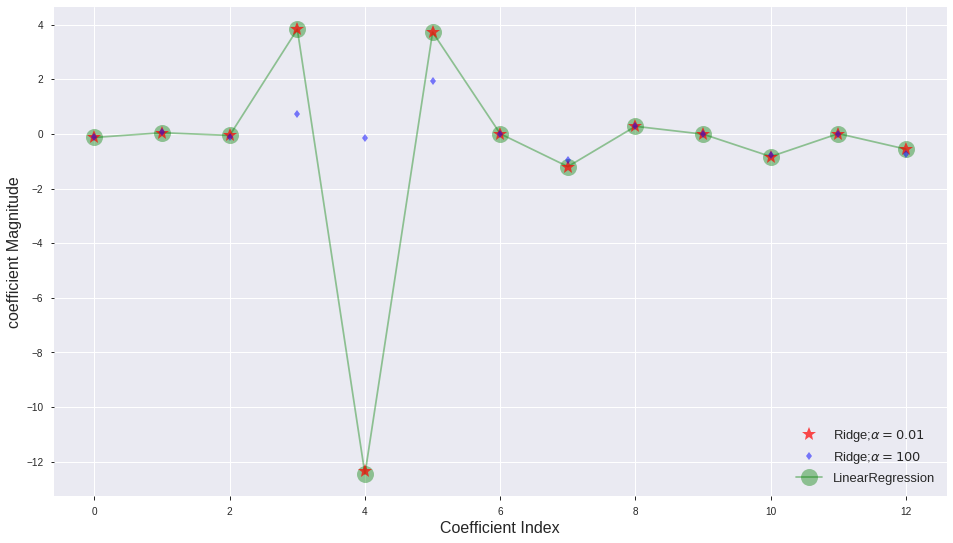

In [30]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge;$\alpha=100$',zorder=7)
#alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='LinearRegression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [31]:
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge,ElasticNet

In [32]:
Lasso_CV=LassoCV()
Ridge_CV=RidgeCV()
rr=Ridge()
Lo=Lasso()
ENET=ElasticNet()

In [33]:
Lasso_CV.fit(X_traine,Y_traine)
Ridge_CV.fit(X_traine,Y_traine)
rr.fit(X_traine,Y_traine)
Lo.fit(X_traine,Y_traine)
ENET.fit(X_traine,Y_traine)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
Predicate=pd.DataFrame({'Lasso_CV_pred':Lasso_CV.predict(X_test),
            'Ridge_CV_pred':Ridge_CV.predict(X_test),
                        'rr':rr.predict(X_test),
                        'Lo':Lo.predict(X_test),'Actual_data':Y_test})
Predicate

,Lasso_CV_pred,Ridge_CV_pred,rr,Lo,Actual_data
0,34.815221,37.995165,37.891037,33.323772,44.8
1,19.576829,19.352648,19.441926,19.398828,17.1
2,21.705997,23.498608,23.808635,20.482723,17.8
3,31.317338,32.435747,32.334118,30.809941,33.1
4,27.439666,24.888559,24.923832,28.434624,21.9
...,...,...,...,...,...
147,23.904292,24.180414,24.074315,23.815683,29.6
148,19.005484,18.905482,18.982621,18.793243,18.0
149,18.947379,18.766011,18.584687,19.115114,20.1
150,13.453442,14.042413,13.669300,13.232803,17.3


In [35]:
#Recursive Feature Elimination:The Syntax
#import the class containing the feature selection method 
from sklearn.feature_selection import RFE

In [43]:
#create an instance of the class
rfeMod=RFE(rr,n_features_to_select=7)

In [44]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod.fit(X_traine,Y_traine)
Y_predict=rfeMod.predict(X_test)

In [45]:
Y_predict

array([37.83108651, 19.44666139, 21.83192159, 31.67451516, 24.37458209,
       23.50920764, 17.73075227,  8.4275312 , 22.87828142, 16.46238622,
        9.47674052, 33.08941045, 35.18892563, 29.67750035,  8.7592864 ,
        8.38598567, 23.90406673, 14.94337652, 14.62382041, 27.9507362 ,
       28.72527335, 36.92175815, 25.58363379, 24.46521439, 11.58446258,
       26.34841037, 20.53674569, 18.73489565, 21.13406847, 23.66804516,
       16.40926491, 31.40039452, 20.79354224, 23.69780843, 16.53509766,
       16.01494277, 22.33039005, 32.91778667, 16.42375531, 23.62041932,
       19.86772679,  7.81087806, 23.8277995 , 17.75408019, 24.13873667,
       26.91182536, 25.3471583 , 16.29438201, 27.01693571, 20.866045  ,
       25.93273822, 20.97087758, 37.46463218, 18.34011395, 24.09810931,
       12.00460045, 37.24148354, 15.95314356, 30.9160439 , 20.51788477,
       23.94014008, 21.1552267 , 32.74353197, 30.70811784, 22.18940641,
       25.92324111, 32.56258313, 23.7909721 , 28.52189171, 28.18

In [46]:
Y_test

array([44.8, 17.1, 17.8, 33.1, 21.9, 21. , 18.4, 10.4, 23.1, 20. , 15.7,
       41.3, 33.3, 30.7,  8.5,  6.3, 21.2, 16.2, 15.6, 24.1, 23.9, 50. ,
       23.2, 23.4, 12.8, 24.6, 18.8, 16.1, 18.2, 24.3, 14.8, 37.3, 21.4,
       18.6, 18.8, 13.9, 24.5, 31.5, 18.2, 20.7, 19.4,  9.7, 21.5, 14.9,
       21.7, 26.5, 20.7, 19.3, 24.5, 19.3, 26.6, 23. , 45.4, 19.8, 22.7,
       23.1, 50. , 17.8, 29.1, 19.2, 22.7, 21.2, 37.2, 31.6, 16.1, 22.2,
       34.9, 20.5, 28. , 29.1, 24.7, 22. , 15.6, 37. , 11.8, 21.7, 19.4,
       23.3, 16.5, 16.7, 23.9, 15.2, 11.9, 19.9, 22.8, 11.3, 25.2, 11.5,
       22. , 21.6, 19.9, 16.8, 19.3, 50. , 29.4, 13.3, 50. , 11.7, 21.7,
       33.4, 20.2, 19.4, 14.9, 19.6, 35.4, 12. , 20.4, 23.7, 21. , 50. ,
       27.5, 12.7, 17.4, 23.8, 22.9, 18.5, 30.3, 31.2, 16. , 23.3, 15. ,
       10.2, 12.5, 19.6, 19.7, 19.5, 15. , 35.4, 13.5, 20.6, 24.7, 21.9,
       17.1, 23.6, 21.1, 15.6, 18.5,  8.3, 14.5, 23.9, 11.8, 24.6, 24.8,
       18.7, 17.9, 48.8, 13. , 29.6, 18. , 20.1, 17